In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\kaush\\Desktop\\BATCH20")

In [3]:
#display.expand_frame_repr allows for the representation of dataframes to stretch across pages, 
#wrapped over the full column vs row-wise.
pd.set_option('display.expand_frame_repr', False)

In [4]:
fund =pd.read_csv("train.csv")
fund.head()

,Unnamed: 0,serial_number,fund_symbol,fund_name,category,fund_family,investment,size,total_net_assets,currency,...,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y
0,0,1,QBDAX,Quantified Managed Income Advisor,Intermediate-Term Bond,Advisors Preferred,Blend,Large,4.077000e+07,USD,...,NaN,NaN,NaN,4,-0.02,0.74,0.10,3.03,0.17,0.64
1,1,2,TSMLX,TIAA-CREF Lifestyle Moderate Retail,Allocation--50% to 70% Equity,TIAA Investments,Growth,Large,3.319900e+08,USD,...,NaN,NaN,NaN,3,-0.14,1.07,0.52,6.86,0.81,5.09
2,2,3,DHQAX,Day Hagan Logix Tactical Dividend A,Large Value,Day Hagan,Value,Large,1.199400e+08,USD,...,NaN,NaN,NaN,1,-2.18,0.69,0.47,8.93,0.56,6.76
3,3,4,NMGCX,Neuberger Berman Mid Cap Growth C,Mid-Cap Growth,Neuberger Berman,Growth,Medium,1.370000e+09,USD,...,11.27,0.54,26.88,3,-3.03,1.02,0.68,11.86,0.63,6.87
4,4,5,MERIX,Merger Institutional,Market Neutral,Westchester Capital,Growth,Large,2.370000e+09,USD,...,NaN,NaN,NaN,2,1.85,-0.16,0.20,2.98,0.59,-10.58


In [5]:
fund.shape

(17775, 57)

In [6]:
fund.columns

Index(['Unnamed: 0', 'serial_number', 'fund_symbol', 'fund_name', 'category',
       'fund_family', 'investment', 'size', 'total_net_assets', 'currency',
       'net_annual_expenses', 'morningstar_rating', 'inception_date',
       'portfolio_cash', 'portfolio_stocks', 'portfolio_bonds',
       'portfolio_others', 'portfolio_preferred', 'portfolio_convertable',
       'sectors_basic_materials', 'sectors_consumer_cyclical',
       'sectors_financial_services', 'sectors_real_estate',
       'sectors_consumer_defensive', 'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning',
       'bonds_us_government', 'bonds_aaa', 'bonds_aa', 'bonds_a', 'bonds_bbb',
       'bonds_bb', 'bonds_b', 'bonds_below_b', 'bonds_others',
       'morningstar_return_rating', 'returns_ytd', 'returns_2017',
       'returns_2016', 'returns_2015', 'returns_2014', 'returns_2013',
       'returns_2012', 're

In [7]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17775 entries, 0 to 17774
Data columns (total 57 columns):
Unnamed: 0                        17775 non-null int64
serial_number                     17775 non-null int64
fund_symbol                       17775 non-null object
fund_name                         17775 non-null object
category                          17775 non-null object
fund_family                       17775 non-null object
investment                        16650 non-null object
size                              16650 non-null object
total_net_assets                  17775 non-null float64
currency                          17775 non-null object
net_annual_expenses               17763 non-null float64
morningstar_rating                17775 non-null int64
inception_date                    17775 non-null object
portfolio_cash                    17770 non-null float64
portfolio_stocks                  17770 non-null float64
portfolio_bonds                   17770 non-null f

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
#fund["category"].value_counts()
fund.category.value_counts().sort_values(ascending=False)[:25].plot.bar()

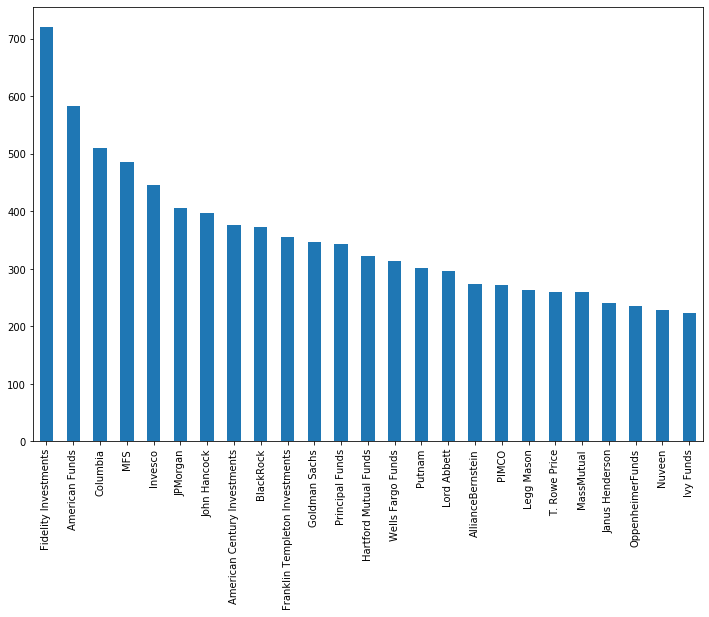

In [9]:
plt.figure(figsize=(12,8))
fund.fund_family.value_counts().sort_values(ascending=False)[:25].plot.bar()

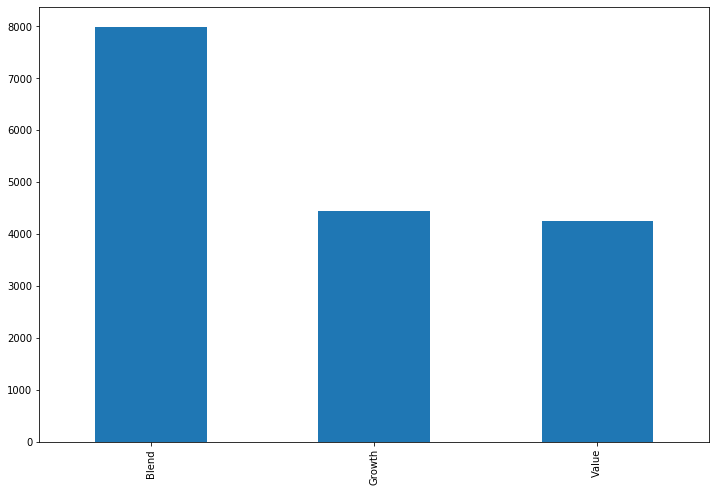

In [10]:
plt.figure(figsize=(12,8))
fund.investment.value_counts().sort_values(ascending=False).plot.bar()

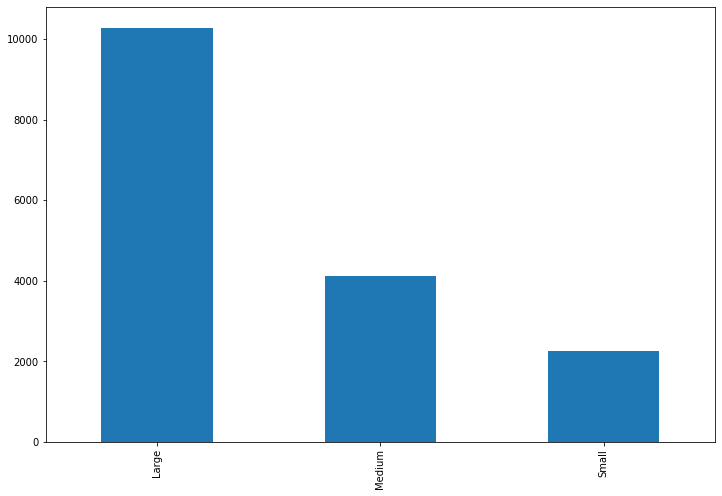

In [11]:
plt.figure(figsize=(12,8))
fund["size"].value_counts().sort_values(ascending=False).plot.bar()

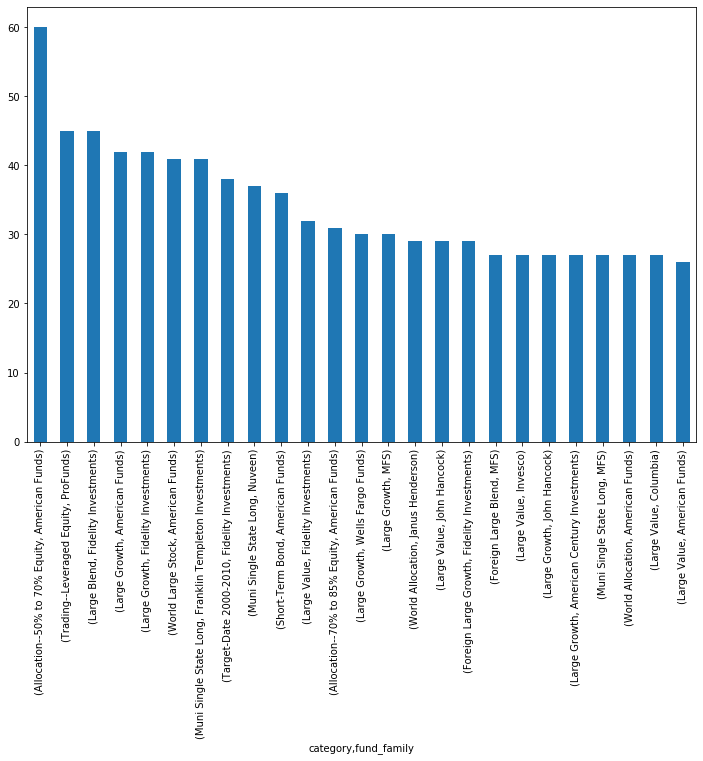

In [12]:
plt.figure(figsize=(12,8))
fund.groupby(['category','fund_family'])['category'].count().sort_values(ascending=False)[:25].plot.bar()

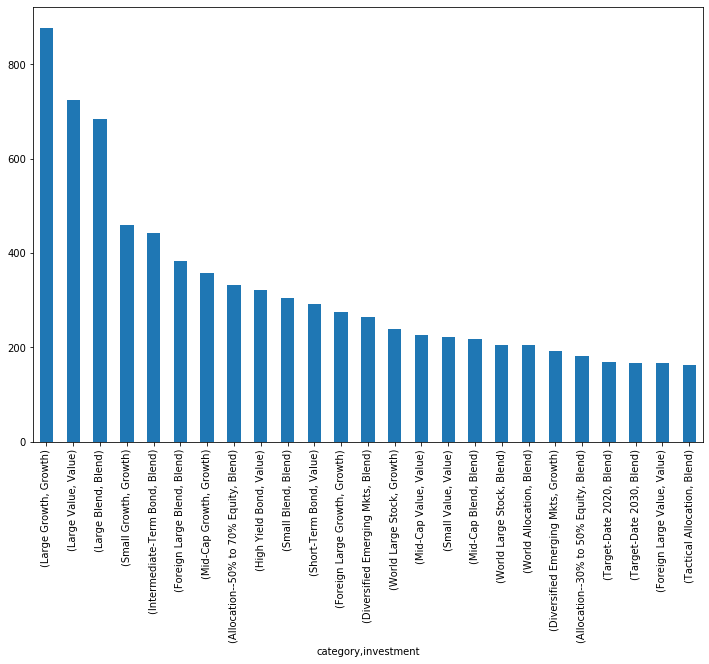

In [13]:
plt.figure(figsize=(12,8))
fund.groupby(['category','investment'])['category'].count().sort_values(ascending=False)[:25].plot.bar()

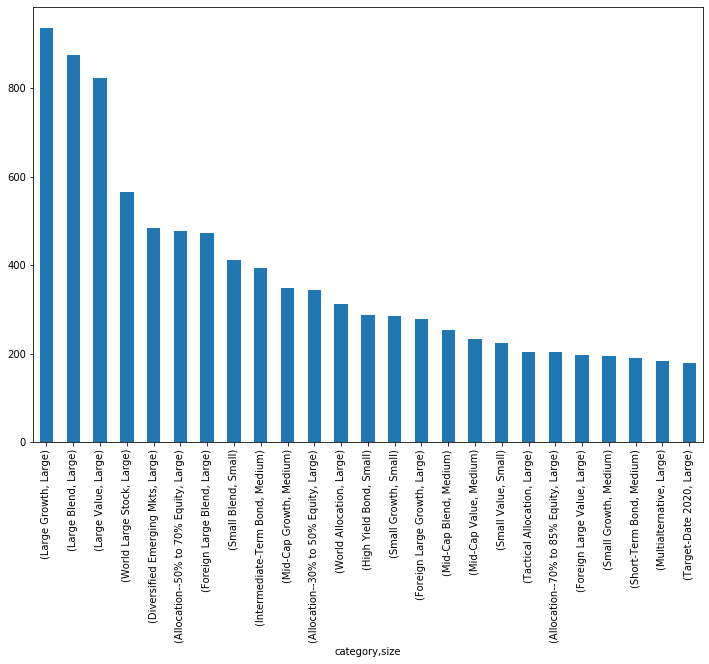

In [14]:
plt.figure(figsize=(12,8))
fund.groupby(['category','size'])['category'].count().sort_values(ascending=False)[:25].plot.bar()

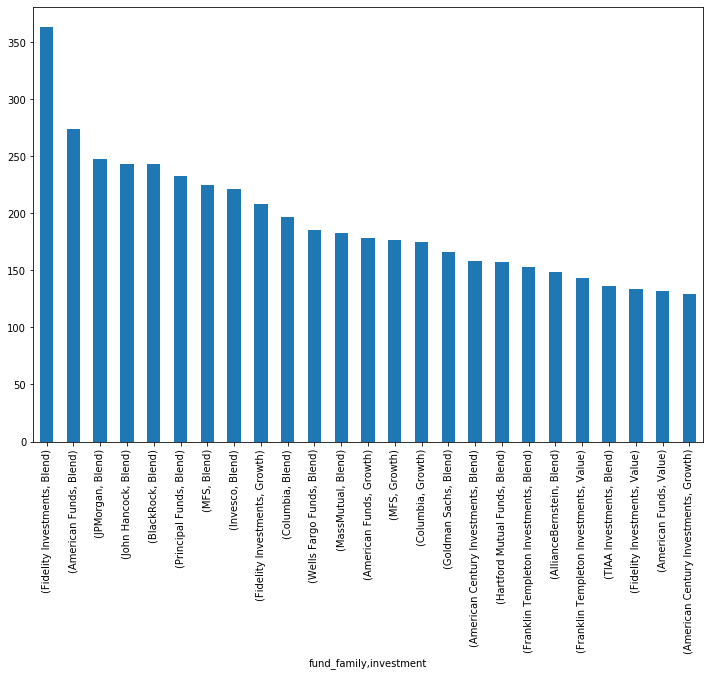

In [15]:
plt.figure(figsize=(12,8))
fund.groupby(['fund_family','investment'])['fund_family'].count().sort_values(ascending=False)[:25].plot.bar()

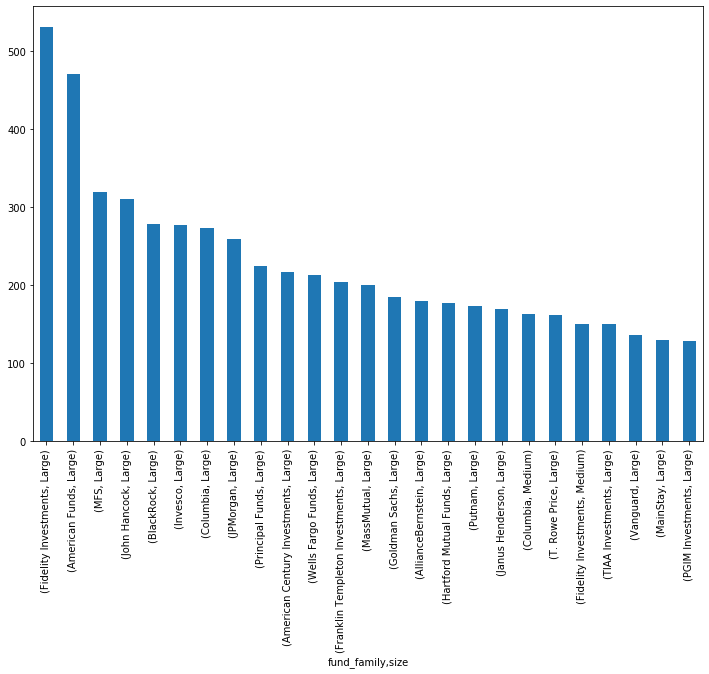

In [16]:
plt.figure(figsize=(12,8))
fund.groupby(['fund_family','size'])['fund_family'].count().sort_values(ascending=False)[:25].plot.bar()

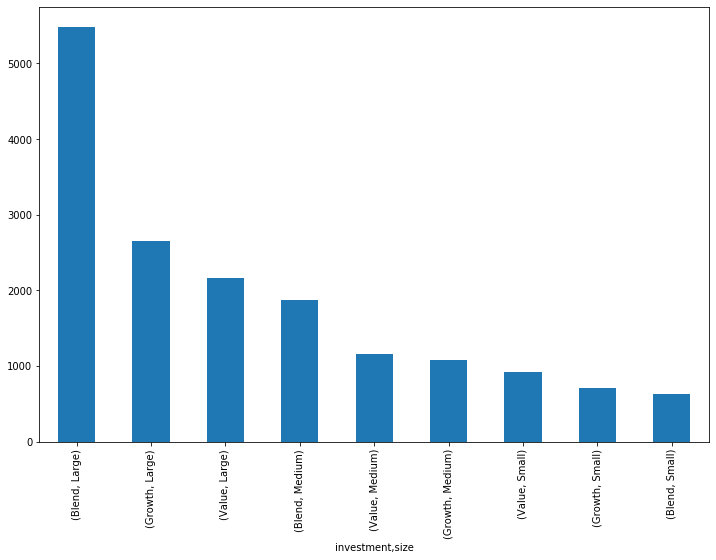

In [17]:
plt.figure(figsize=(12,8))
fund.groupby(['investment','size'])['investment'].count().sort_values(ascending=False).plot.bar()

In [18]:
fund = fund[~fund['bonds_aaa'].isnull()].reset_index()

In [19]:
import warnings
warnings.filterwarnings("ignore")

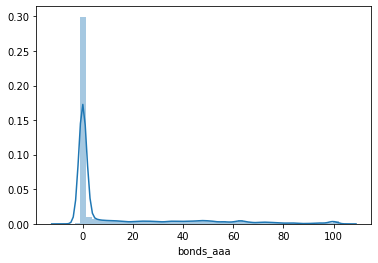

In [20]:
import seaborn as sns
sns.distplot(fund['bonds_aaa'])

In [21]:
#skewness and kurtosis
print("Skewness: %f" % fund['bonds_aaa'].skew())
print("Kurtosis: %f" % fund['bonds_aaa'].kurt())

Skewness: 1.894421
Kurtosis: 2.605314


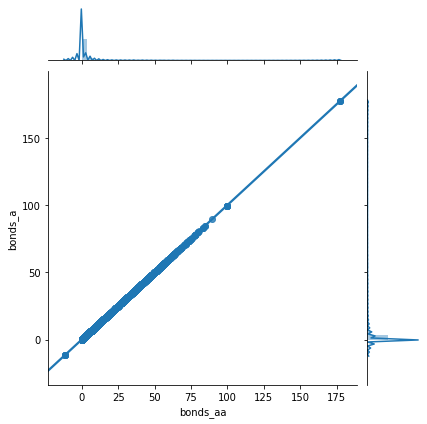

In [22]:
sns.jointplot('bonds_aa', 'bonds_a', data=fund, kind='reg')

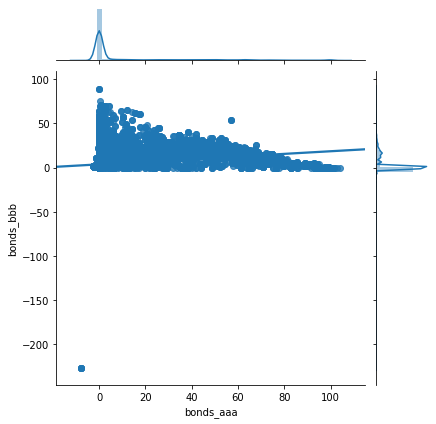

In [23]:
sns.jointplot('bonds_aaa', 'bonds_bbb', data=fund, kind='reg')

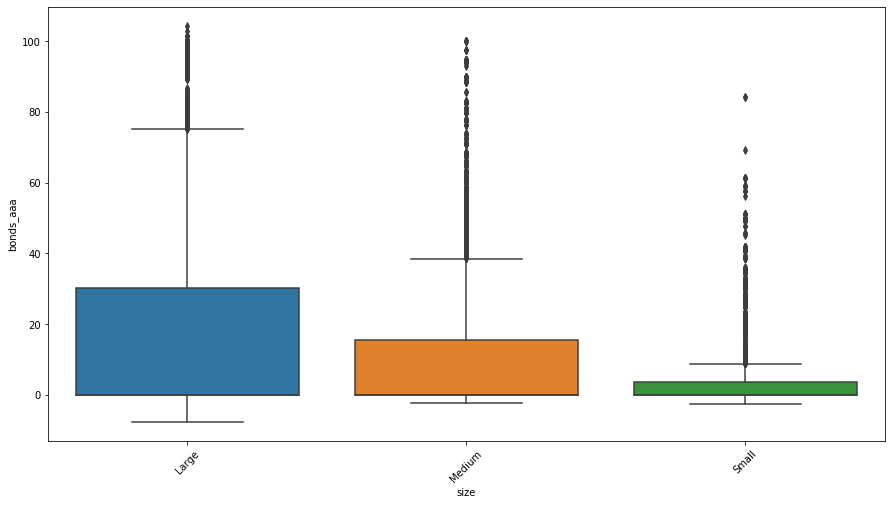

In [24]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('size', 'bonds_aaa', data=fund)

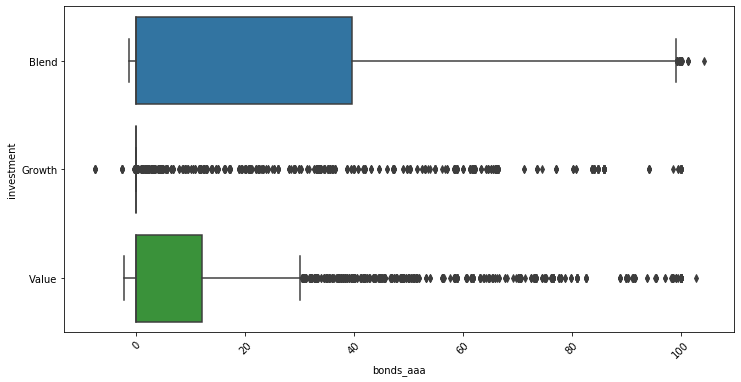

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 45)
sns.boxplot('bonds_aaa', 'investment', data=fund)

In [26]:
all_words = ' '.join([text for text in fund['fund_name']])

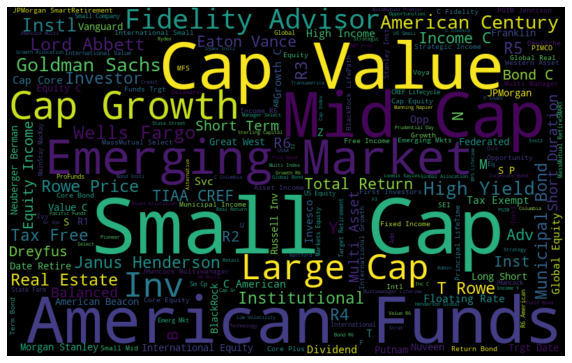

In [28]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="black").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
fund.columns

Index(['index', 'Unnamed: 0', 'serial_number', 'fund_symbol', 'fund_name',
       'category', 'fund_family', 'investment', 'size', 'total_net_assets',
       'currency', 'net_annual_expenses', 'morningstar_rating',
       'inception_date', 'portfolio_cash', 'portfolio_stocks',
       'portfolio_bonds', 'portfolio_others', 'portfolio_preferred',
       'portfolio_convertable', 'sectors_basic_materials',
       'sectors_consumer_cyclical', 'sectors_financial_services',
       'sectors_real_estate', 'sectors_consumer_defensive',
       'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning',
       'bonds_us_government', 'bonds_aaa', 'bonds_aa', 'bonds_a', 'bonds_bbb',
       'bonds_bb', 'bonds_b', 'bonds_below_b', 'bonds_others',
       'morningstar_return_rating', 'returns_ytd', 'returns_2017',
       'returns_2016', 'returns_2015', 'returns_2014', 'returns_2013',
       're

In [ ]:
feature engineering 

In [31]:
fund.drop(['index','Unnamed: 0', 'serial_number','fund_symbol','fund_name','category', 'fund_family','currency', 'inception_date','bonds_us_government','returns_ytd', 
            'returns_2017', 'returns_2016','returns_2015','returns_2014', 'returns_2013','returns_2012','returns_2011','returns_2010'], inplace=True, axis=1)
fund.head(5)

,investment,size,total_net_assets,net_annual_expenses,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,...,bonds_below_b,bonds_others,morningstar_return_rating,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y
0,Blend,Large,4.077000e+07,2.01,3,14.60,25.06,49.12,0.52,7.38,...,4.01,0.53,3,4,-0.02,0.74,0.10,3.03,0.17,0.64
1,Growth,Large,3.319900e+08,0.37,4,1.54,60.91,36.15,1.23,0.11,...,1.40,3.35,4,3,-0.14,1.07,0.52,6.86,0.81,5.09
2,Value,Large,1.199400e+08,1.60,2,13.12,79.78,6.84,0.24,0.00,...,0.00,0.00,2,1,-2.18,0.69,0.47,8.93,0.56,6.76
3,Growth,Medium,1.370000e+09,1.86,3,4.27,95.73,0.00,0.00,0.00,...,0.00,0.00,3,3,-3.03,1.02,0.68,11.86,0.63,6.87
4,Growth,Large,2.370000e+09,1.11,4,43.31,48.46,5.66,2.12,0.14,...,0.00,0.00,4,2,1.85,-0.16,0.20,2.98,0.59,-10.58


In [32]:
"""
fund_copy = fund.copy().dropna(how='all')
fund.shape
"""

"\nfund_copy = fund.copy().dropna(how='all')\nfund.shape\n"

In [33]:
fund["investment"]=fund["investment"].map({"Blend": 0, "Growth":1,"Value": 2})

In [34]:
fund["size"]=fund["size"].map({"Large": 0, "Medium":1,"Small": 2})

In [35]:
fund.isnull().sum()

investment                        1124
size                              1124
total_net_assets                     0
net_annual_expenses                 12
morningstar_rating                   0
portfolio_cash                       0
portfolio_stocks                     0
portfolio_bonds                      0
portfolio_others                     0
portfolio_preferred                  0
portfolio_convertable                0
sectors_basic_materials              0
sectors_consumer_cyclical            0
sectors_financial_services           0
sectors_real_estate                  0
sectors_consumer_defensive           0
sectors_healthcare                   0
sectors_utilities                    0
sectors_communication_services       0
sectors_energy                       0
sectors_industrials                  0
sectors_technology                   0
price_earning                        0
bonds_aaa                            0
bonds_aa                             0
bonds_a                  

In [36]:
fund.dropna(inplace=True)

In [37]:
y = fund[['bonds_aaa']]#target variable
y

,bonds_aaa
0,11.75
1,47.05
2,14.99
3,0.00
4,0.00
...,...
17762,3.39
17764,0.00
17767,0.00
17768,32.57


In [38]:
y=y.values
y

array([[11.75],
       [47.05],
       [14.99],
       ...,
       [ 0.  ],
       [32.57],
       [ 0.  ]])

In [39]:
fund.drop(['bonds_aaa'],axis=1,inplace=True)

In [40]:
X=fund.values
X

array([[0.0000e+00, 0.0000e+00, 4.0770e+07, ..., 3.0300e+00, 1.7000e-01,
        6.4000e-01],
       [1.0000e+00, 0.0000e+00, 3.3199e+08, ..., 6.8600e+00, 8.1000e-01,
        5.0900e+00],
       [2.0000e+00, 0.0000e+00, 1.1994e+08, ..., 8.9300e+00, 5.6000e-01,
        6.7600e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 4.6500e+09, ..., 1.1250e+01, 6.6000e-01,
        8.0600e+00],
       [1.0000e+00, 0.0000e+00, 2.9570e+10, ..., 6.6100e+00, 1.1700e+00,
        7.8900e+00],
       [0.0000e+00, 0.0000e+00, 1.8800e+09, ..., 9.6200e+00, 9.9000e-01,
        1.0660e+01]])

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X=scaler.transform(X)
X

array([[-0.95449862, -0.72787823, -0.19762928, ..., -1.22234583,
        -1.04374201, -0.13321254],
       [ 0.25401785, -0.72787823, -0.18173482, ..., -0.44363329,
         0.67841752, -0.02749745],
       [ 1.46253431, -0.72787823, -0.19330827, ..., -0.02276254,
         0.00569895,  0.0121754 ],
       ...,
       [ 0.25401785, -0.72787823,  0.05393731, ...,  0.448938  ,
         0.27478638,  0.04305846],
       [ 0.25401785, -0.72787823,  1.41404285, ..., -0.49446309,
         1.64713226,  0.03901991],
       [-0.95449862, -0.72787823, -0.09724617, ...,  0.11752771,
         1.16277489,  0.10482458]])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10510, 38) (4505, 38) (10510, 1) (4505, 1)


# LINEAR REGRESSION

In [43]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

In [44]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
LR.score(X_train,y_train)

0.4374200194893084

In [46]:
LR.score(X_test,y_test)

0.42862248177584783

# GRADIENT BOOSTING REGRESSOR

In [47]:
#pip install xgboost in anaconda prompt
import xgboost as xgb
from xgboost import XGBRegressor

xgb=XGBRegressor()

In [48]:
xgb = XGBRegressor(colsample_bytree=0.4,
                 gamma=5.0,                 
                 learning_rate=0.1,
                 max_depth=9,
                 min_child_weight=1,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [49]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=5.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=42, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
xgb.score(X_train,y_train)

0.998194935992724

In [51]:
xgb.score(X_test,y_test)

0.9715467363249127

In [52]:
xgb.score(X,y)

0.9899826855645011

In [53]:
y_pred=xgb.predict(X_test)

In [54]:
y_pred#predicted values

array([ 1.1101806e+00, -1.7679854e-01, -3.9764464e-02, ...,
        8.3401436e+01,  1.5467887e+01, -2.5695142e-01], dtype=float32)

In [55]:
y_test#actual values

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       ...,
       [83.96],
       [16.54],
       [ 0.  ]])

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

4.274648943694926

# WORKING ON TEST DATA

In [57]:
fund_test=pd.read_csv("test.csv")
fund_test.head()

,Unnamed: 0,Unnamed: 0.1,serial_number,fund_symbol,fund_name,category,fund_family,investment,size,total_net_assets,...,returns_2012,returns_2011,returns_2010,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y
0,0,0,1,SPIAX,Invesco S&P 500 Index A,Large Blend,Invesco,Blend,Large,1.220000e+09,...,15.31,1.51,14.57,3,-0.54,1.00,0.87,10.26,0.95,9.69
1,1,1,2,JBAWX,JHancock Balanced R6,Allocation--50% to 70% Equity,John Hancock,Blend,Large,1.900000e+08,...,15.86,NaN,NaN,3,-0.58,1.10,0.49,7.08,0.74,4.67
2,2,2,3,PNYCX,Dreyfus NY AMT-Free Municipal Bond C,Muni New York Intermediate,Dreyfus,Blend,Medium,3.627500e+08,...,5.52,9.15,0.96,4,-1.23,1.06,0.14,3.51,0.29,0.91
3,3,3,4,SFEPX,Guggenheim StylePlus - Large Core P,Large Blend,Guggenheim Investments,Value,Large,2.187800e+08,...,NaN,NaN,NaN,3,-0.67,1.02,0.88,10.56,0.93,9.56
4,4,4,5,PCNSX,Principal SAM Conservative Bal R2,Allocation--30% to 50% Equity,Principal Funds,Blend,Large,1.760000e+09,...,10.35,1.29,10.96,3,-0.95,0.76,0.31,4.79,0.64,3.96


In [58]:
fund_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7618 entries, 0 to 7617
Data columns (total 57 columns):
Unnamed: 0                        7618 non-null int64
Unnamed: 0.1                      7618 non-null int64
serial_number                     7618 non-null int64
fund_symbol                       7618 non-null object
fund_name                         7618 non-null object
category                          7618 non-null object
fund_family                       7618 non-null object
investment                        7193 non-null object
size                              7193 non-null object
total_net_assets                  7618 non-null float64
currency                          7618 non-null object
net_annual_expenses               7614 non-null float64
morningstar_rating                7618 non-null int64
inception_date                    7618 non-null object
portfolio_cash                    7615 non-null float64
portfolio_stocks                  7615 non-null float64
portfolio_bon

In [59]:
fund_test.drop(['Unnamed: 0','Unnamed: 0.1', 'serial_number','category', 'fund_family','currency', 'inception_date','bonds_us_government','returns_ytd', 
            'returns_2017', 'returns_2016','returns_2015','returns_2014', 'returns_2013','returns_2012','returns_2011','returns_2010'], inplace=True, axis=1)
fund_test.head(5)

,fund_symbol,fund_name,investment,size,total_net_assets,net_annual_expenses,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,...,bonds_below_b,bonds_others,morningstar_return_rating,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y
0,SPIAX,Invesco S&P 500 Index A,Blend,Large,1.220000e+09,0.58,3,1.20,98.80,0.00,...,0.00,0.00,3,3,-0.54,1.00,0.87,10.26,0.95,9.69
1,JBAWX,JHancock Balanced R6,Blend,Large,1.900000e+08,0.67,4,0.60,64.36,33.81,...,1.36,0.00,4,3,-0.58,1.10,0.49,7.08,0.74,4.67
2,PNYCX,Dreyfus NY AMT-Free Municipal Bond C,Blend,Medium,3.627500e+08,1.66,2,0.00,0.00,100.00,...,0.00,5.66,2,4,-1.23,1.06,0.14,3.51,0.29,0.91
3,SFEPX,Guggenheim StylePlus - Large Core P,Value,Large,2.187800e+08,1.44,4,12.78,22.86,28.98,...,0.00,0.00,4,3,-0.67,1.02,0.88,10.56,0.93,9.56
4,PCNSX,Principal SAM Conservative Bal R2,Blend,Large,1.760000e+09,1.03,3,9.53,37.89,50.22,...,2.68,2.28,3,3,-0.95,0.76,0.31,4.79,0.64,3.96


In [60]:
fund_test["investment"]=fund_test["investment"].map({"Blend": 0, "Growth":1,"Value": 2})

In [61]:
fund_test["size"]=fund_test["size"].map({"Large": 0, "Medium":1,"Small": 2})

In [62]:
fund_test.isnull().sum()

fund_symbol                         0
fund_name                           0
investment                        425
size                              425
total_net_assets                    0
net_annual_expenses                 4
morningstar_rating                  0
portfolio_cash                      3
portfolio_stocks                    3
portfolio_bonds                     3
portfolio_others                    3
portfolio_preferred                 3
portfolio_convertable               3
sectors_basic_materials             3
sectors_consumer_cyclical           3
sectors_financial_services          3
sectors_real_estate                 3
sectors_consumer_defensive          3
sectors_healthcare                  3
sectors_utilities                   3
sectors_communication_services      3
sectors_energy                      3
sectors_industrials                 3
sectors_technology                  3
price_earning                       3
bonds_aa                            3
bonds_a     

In [63]:
fund_test.dropna(inplace=True)

In [64]:
fund_symbol_test=fund_test.fund_symbol

In [65]:
fund_name_test=fund_test.fund_name

In [66]:
fund_test.drop(['fund_symbol','fund_name'], inplace=True, axis=1)

In [67]:
z=fund_test


from sklearn.preprocessing import StandardScaler


z=scaler.transform(z)

In [68]:
list((fund.columns==fund_test.columns))

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [69]:
pd.value_counts(list((fund.columns==fund_test.columns)))

True    38
dtype: int64

In [70]:
xgb.predict(z)

array([-0.04971156, 43.017372  ,  9.772858  , ...,  0.7785307 ,
        0.22154711, -0.05895093], dtype=float32)

In [71]:
submission_predict=xgb.predict(z)

In [72]:
submission=pd.DataFrame(data = {'fund_symbol':fund_symbol_test,'fund_name':fund_name_test,'bonds_aaa_test':submission_predict})

In [73]:
submission.to_csv('Sample_Submission.csv',index = False)